## Osa 02 -- Pandas DataFrame demo

In [3]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

### Luetaan data sisään

Voi kokeilla myös asettaa index_col='PVM'

In [13]:
data = pd.read_csv('../data/osakkeet.csv')
data.head()

,PVM,Neste,Kemira,Metsa,Outokumpu,StoraEnso,UPM,Cargotec,Huhtamaki,Kone,Sanoma,Elisa,Nokia
0,30/12/2020,59.559,13.019,8.624,3.209,15.882,30.526,33.936,42.580,66.683,13.849,45.076,3.168
1,29/12/2020,59.359,13.037,8.548,3.191,15.896,30.550,34.064,42.768,67.376,13.890,45.174,3.210
2,28/12/2020,58.780,12.954,8.491,3.207,15.840,30.371,34.262,42.505,67.145,13.823,44.534,3.171
3,23/12/2020,58.081,12.659,8.492,3.168,15.482,29.857,33.421,42.104,65.886,13.856,44.637,3.156
4,22/12/2020,57.800,12.526,8.496,3.142,15.367,29.731,33.446,41.949,66.484,13.633,44.331,3.145


### Muutetaan 'PVM' sarake merkkijonosta python datetimeksi

In [12]:
data['PVM'] = pd.to_datetime(data['PVM'], format='%d/%m/%Y')
print(data['PVM'].dtype)

datetime64[ns]


### Sarakkeen valitseminen
Lisäys videon jälkeen. Ottamalla kopion data DataFramesta vältetään varoitus
"A value is trying to be set on a copy of a slice from a DataFrame", joka voi
olla joissain tapauksissa ongelmallista.
Asiasta lisää [Pandas dokumentaatiossa](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)

In [8]:
dataNokia = data[['PVM', 'Nokia']].copy()

### Sarakkeen lisääminen
Tässä vaiheessa lisätään sarake dataNokia DataFrameen. Uuden sarakkeen nimi on 'juoksevaKA'.
Tässä vaiheessa ei tarvitse vielä välittää, mitä yhtäsuuruusmerkkien oikealla puolella oleva
koodi tekee. Juoksevan keskiarvon laskemista käsitellään jaksossa 08. Jakson koodi löytyy jo
[GitHubista](https://github.com/PythonVinkit/youtube-sarja/tree/main/08_pandas_rolling).

In [15]:
dataNokia['juoksevaKA'] = dataNokia['Nokia'].rolling(window=5).mean().fillna(method='ffill')
dataNokia.head(10)

,PVM,Nokia,juoksevaKA
0,2020-12-30,3.168,NaN
1,2020-12-29,3.210,NaN
2,2020-12-28,3.171,NaN
3,2020-12-23,3.156,NaN
4,2020-12-22,3.145,3.1700
5,2020-12-21,3.125,3.1614
6,2020-12-18,3.262,3.1718
7,2020-12-17,3.295,3.1966
8,2020-12-16,3.271,3.2196
9,2020-12-15,3.312,3.2530


### Rivin valitseminen

In [16]:
dataNokia[10:20:2]

,PVM,Nokia,juoksevaKA
10,2020-12-14,3.288,3.2856
12,2020-12-10,3.425,3.3236
14,2020-12-08,3.405,3.3804
16,2020-12-04,3.279,3.3778
18,2020-12-02,3.292,3.3172


In [18]:
dataNokia.loc[dataNokia['PVM'] > datetime(2020,4,29), :]

,PVM,Nokia,juoksevaKA
0,2020-12-30,3.168,NaN
1,2020-12-29,3.210,NaN
2,2020-12-28,3.171,NaN
3,2020-12-23,3.156,NaN
4,2020-12-22,3.145,3.1700
...,...,...,...
165,2020-05-07,3.291,3.2976
166,2020-05-06,3.255,3.2966
167,2020-05-05,3.219,3.2762
168,2020-05-04,3.230,3.2584


### Käännetään dataNokia ympäri

Tämä jäi videolla näyttämättä

In [23]:
dataNokia = dataNokia[::-1].reset_index(drop=True)
dataNokia.head()

,PVM,Nokia,juoksevaKA
0,2011-01-03,7.951,8.0792
1,2011-01-04,8.078,8.1012
2,2011-01-05,8.145,8.1232
3,2011-01-07,8.170,8.1418
4,2011-01-10,8.052,8.1430


### Valitaan dataNokiasta rivit kahden päivämäärän avulla

Kuten videolla käytiinkin läpi nyt ei ole mahdollista käyttää pythonin 'and' operaattoria, koska kahden maskin totuusarvo on epäselvä. Maskit ovat käytännössä sarja Tosi ja Epätosi -arvoja ja on epäselvää pitäisikö maski1 JA maski2 -lausekkeen tulos olla esimerkiksi Tosi, koska molemmissa maskeissa on yli nolla elementtiä vai pitäisikö lausekkeen arvo olla Epätosi, koska molemmissa sarjoissa on epätosi-arvoja.

Kaksi ehtoa saadaan verrattua käyttämällä elementeittän vertailevaa '&' operaattoria.

In [24]:
maski1 = dataNokia['PVM'] > '20110501'
maski2 = dataNokia['PVM'] < '20110529'

dataNokia[maski1 & maski2]

,PVM,Nokia,juoksevaKA
82,2011-05-02,6.278,6.0428
83,2011-05-03,6.302,5.9710
84,2011-05-04,5.923,5.9002
85,2011-05-05,5.836,5.9364
86,2011-05-06,5.875,5.9808
87,2011-05-09,5.919,6.0162
88,2011-05-10,5.948,6.0386
89,2011-05-11,6.104,6.0620
90,2011-05-12,6.058,6.0476
91,2011-05-13,6.052,6.0272


### Kuvaaja

Tehdään lopuksi kuvaaja Nokian osakkeen päivittäisestä hinnasta ja sen juoksevasta keskiarvosta.

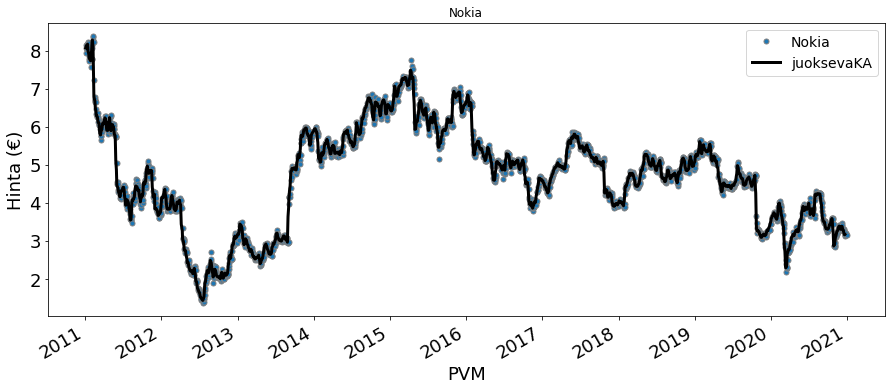

In [28]:
ax = dataNokia.plot(x='PVM', y=['Nokia', 'juoksevaKA'], linewidth=3, fontsize=18, title='Nokia', figsize=(15,6))
ax.set_xlabel('PVM',fontsize=18)
ax.set_ylabel('Hinta (€)', fontsize=18)
ax.properties()['children'][0].set_linestyle('None')
ax.properties()['children'][0].set_marker('o')
ax.properties()['children'][0].set_markersize(5)
ax.properties()['children'][0].set_markeredgecolor('gray')
ax.properties()['children'][1].set_color('k')

ax.legend(fontsize=14)
